# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек.

Выполнил студент гр. 9381 Николаев Александр, вариант 57.

## Цель работы.

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

# Основные теоретические положения.

### Бинарный метод.

Бинарный медот, позволяет быстро возводить в степерь натуральное число. Алгоритм быстрого возведения, заключается в переводе степени числа в систему счисления по основанию 2 и применении следующего правила:
Убирается левый бит, затем поочередно рассматривается каждый бит в получившейся двоичной записи, если он равен 0, то основание возводится в квадрат, иначе основание возводится в квадрат и затем умножается на себя.

### Метод множителей.

Метод множителей, ещё один метод, который позволяет быстро возводить в степерь натуральное число. Степень числа представляется в виде произведения наименьшего простого делителя этой степени (i) и второго множителя (j). Если основание не простое, то оно возводится в степень i и затем в j, иначе основание возводится в степень, равную основанию - 1 и затем умножается само на себя.

### Аддитивная цепочка.

Аддитивной цепочкой для числа n называется любая начинающаяся с 1 последовательность натуральных чисел, в которой каждое число является суммой каких-то двух предыдущих чисел (возможно совпадающих).

### Алгоритм Брауэра.
    
Алгоритм Брауэра вычисляет n степень за $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$ операций.

### Звездная цепочка. Гипотеза Шольца-Брауэра.

Звёздная цепочка - цепочка которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $

Пусть $l^*(n)$ - длина некоторой звёздной цепочки.
Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

### Постановка задачи.

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы.

### Бинарный метод и метод множителей.

Бинарный метод.

In [3]:
def binpow(x, y):
    y = bin(y)[3:]

    currentResult = x
    countActions = 0
    for num in y:
        if num == '0':
            currentResult *= currentResult
            countActions += 1
        elif num == '1':
            currentResult *= currentResult
            currentResult *= x
            countActions += 2
            
    return [currentResult, countActions]

print(binpow(2, 33))
print(binpow(2, 63))
print(binpow(2, 65))

[8589934592, 6]
[9223372036854775808, 10]
[36893488147419103232, 7]


Метод множителей.

In [4]:
def mulpow(x, y):
    factorY = factor(y)
    if factorY[0][0] == y:
        # x - число, y - степень, y - не раскл. бинвозв(число, степень - 1), результат * число. 2^13. (2^12)*2.
        result = binpow(x, y - 1)
        result[0] *= x
        result[1] += 1
        return result
    # резульат1 = бинвозв(число, простое), бинвозв(результат1, степень // простое)
    result = binpow(x, factorY[0][0])
    currentResult = binpow(result[0], y // factorY[0][0])
    return [currentResult[0], result[1] + currentResult[1]]

print(mulpow(2, 33))
print(mulpow(2, 63))
print(mulpow(2, 65))

[8589934592, 7]
[9223372036854775808, 8]
[36893488147419103232, 8]


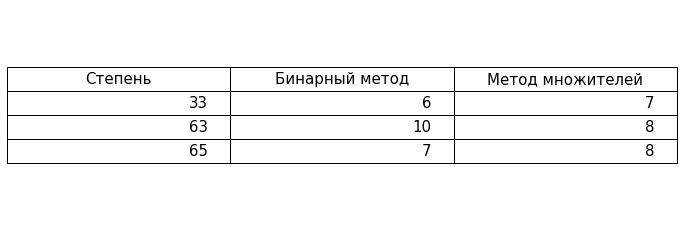

In [25]:
import matplotlib.pyplot as plt

headers = ["Степень", "Бинарный метод", "Метод множителей"]

degrees = [33, 63, 65]
results = []

for i in degrees:
    results.append([i, binpow(x, i)[1], mulpow(x, i)[1]])
    
    
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.set_fontsize(15)
table.scale(2, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

#### Выводы:
В зависимости от числа, может быть эффективнее разный метод. Для чисел, образованых формулой $ 2^k-1 $ метод множителей окажется эффективнее,а для чисел, порядка  $ 2^k+1 $, будет более эффективным бинарный метод. При других значениях, метод множителей всегда будет лучше или равен бинарному методу, по количеству шагов.

### Алгоритм Брауэра.

Была написаная программа, преобразующая число, в аддитивную цепочку, методом Брауэра.

In [19]:
def brauer(n, k, Bk):
    if n >= 2 ** k:
        q = n // 2 ** k
        brauer(q, k, Bk)
        for i in range(1, k + 1):
            q *= 2
            Bk.append(q)
        Bk.append(n)
        return Bk
    elif n < 2 ** k:
        for i in range(1, 2 ** k):
            Bk.append(i)
        return Bk

for i in range(1, 5):
    Bk = brauer(2356, i, [])
    print(Bk, len(Bk))

[1, 2, 2, 4, 4, 8, 9, 18, 18, 36, 36, 72, 73, 146, 147, 294, 294, 588, 589, 1178, 1178, 2356, 2356] 23
[1, 2, 3, 4, 8, 9, 18, 36, 36, 72, 144, 147, 294, 588, 589, 1178, 2356, 2356] 18
[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 36, 72, 144, 288, 294, 588, 1176, 2352, 2356] 19
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 36, 72, 144, 147, 294, 588, 1176, 2352, 2356] 25


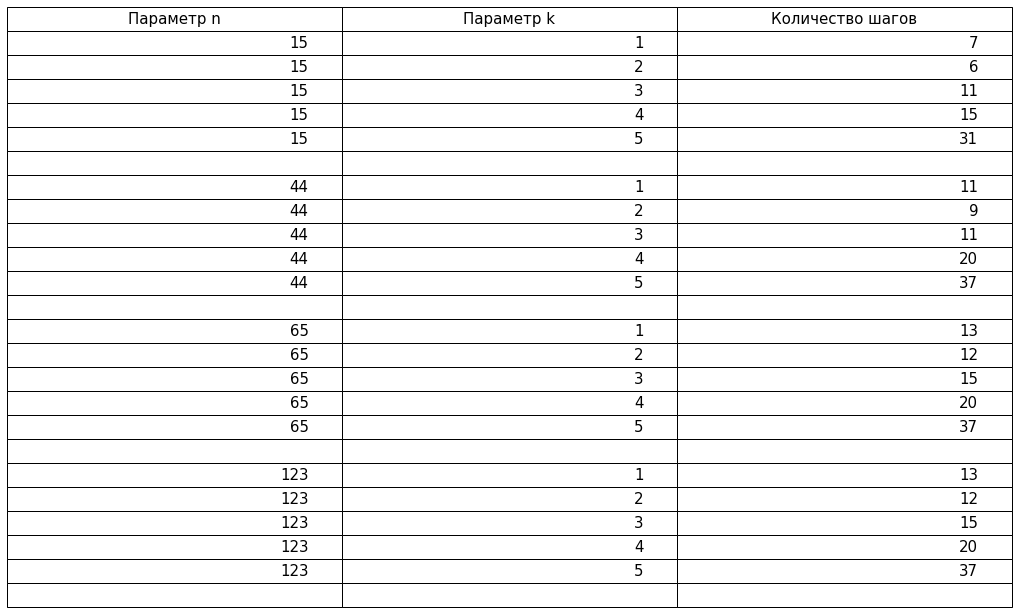

In [53]:
import matplotlib.pyplot as plt

headers = ["Параметр n", "Параметр k", "Количество шагов"]

degrees = [15, 44, 65, 123]
results = []

for i in degrees:
    for j in range(1, 6):
        res = brauer(i, j, [])
        results.append([i, j, len(res)])
    results.append(["", "", ""])
    
    
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.set_fontsize(15)
table.scale(3, 2)

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

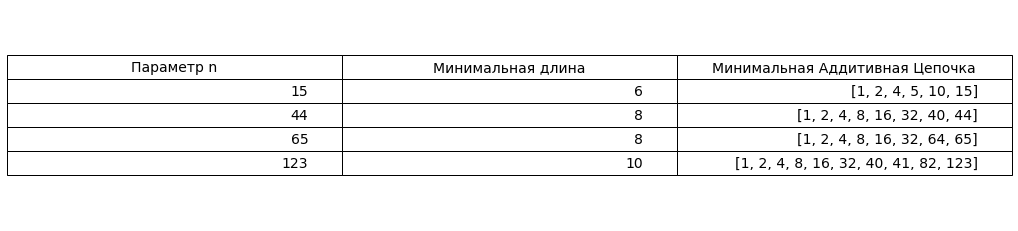

In [52]:
import matplotlib.pyplot as plt

headers = ["Параметр n", "Минимальная длина", "Минимальная Аддитивная Цепочка"]

degrees = [15, 44, 65, 123]
results = []

for i in degrees:
    res = findMinStarChain(i)
    results.append([i, len(res), res])
    
    
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.set_fontsize(15)
table.scale(3, 2)

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Вывод:

Алгоритм Брауэра не дает минимальную цепочку. Для разных чисел n, разные числа k будут давать минимальные аддитивные цепочки. Для разных чисел, параметр k, может как уменьшить, так и увеличить длинну аддитивной цепочки.

### Алгоритм дробления ВИ.

In [39]:
import math
import time

def decRi(ri, q = 1):
    m = q + len(ri) - 1
    for i in range(1, len(ri) + 1):
        if ri[-i] == 1:
            if i == len(ri):
                ri.append(1)
                for j in range(len(ri)):
                    ri[j] = j + q
                break
            ri[-i] = m
            m -= 1
        else:
            ri[-i] -= 1
            break

def buildStarChain(ri):
    starChain = [1]
    for i in ri:
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain
    
def findMinStarChain (n):
    downBorder = int(math.log2(n))
    upBorder = int(log(n, 2) + bin(n).count('1') - 1)
    
    for m in range(downBorder, upBorder + 1):
        q = m // 2
        
        if q == 0:
            q = 1
        
        ri = [i for i in range(1, q + 1)]
                
        while (len(ri) == q):
            _ri = [i + q for i in range (1, m - q + 1)]
            chain = buildStarChain(ri)
            
            Amax = chain[-1] * 2 ** (m - q)
            Amin = chain[-1] + m - q
            
            if Amin == n:
                return buildStarChain(ri + [1 for i in range(1, m - q + 1)])
            if Amax == n:
                return buildStarChain(ri + [i + q for i in range (1, m - q + 1)])
            if Amin > n or n > Amax:
                decRi(ri)
                continue
            while len(_ri) == m - q:
                chain = buildStarChain(ri + _ri)
                if chain[-1] == n:
                    return chain
                decRi(_ri, q + 1)
            decRi(ri)
               
start = time.time()
minStarChain = findMinStarChain(98)
end = time.time()
print(minStarChain, "Len:", len(minStarChain), "Elapsed time:", end - start)

[1, 2, 4, 8, 16, 32, 64, 96, 98] Len: 9 Elapsed time: 0.020069122314453125


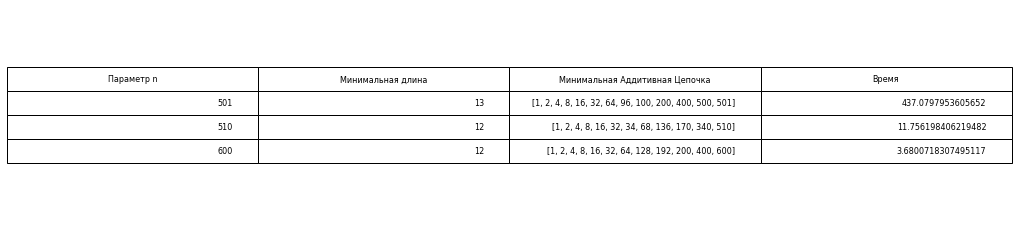

In [62]:
import matplotlib.pyplot as plt

headers = ["Параметр n", "Минимальная длина", "Минимальная Аддитивная Цепочка", "Время"]

degrees = [501, 510, 600]
results = []

for i in degrees:
    start = time.time()
    res = findMinStarChain(i)
    end = time.time()
    results.append([i, len(res), res, end - start])
       
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.set_fontsize(40)
table.scale(3, 2)

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

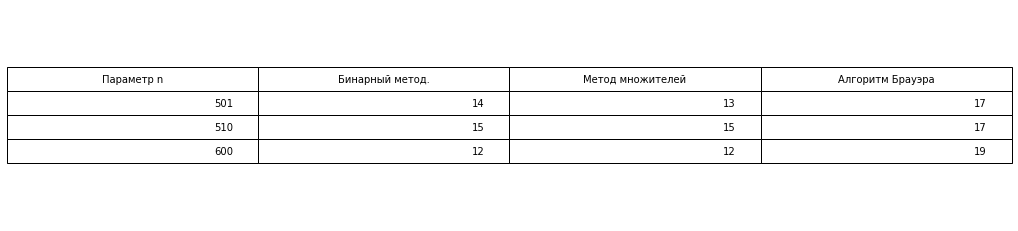

In [66]:
import matplotlib.pyplot as plt

headers = ["Параметр n", "Бинарный метод.", "Метод множителей", "Алгоритм Брауэра"]

degrees = [501, 510, 600]
results = []

for i in degrees:
    results.append([i, binpow(2, i)[1], mulpow(2, i)[1], len(brauer(i, 1, []))])
       
table = plt.table(cellText = results, colLabels = headers, loc = 'center')

table.set_fontsize(10)
table.scale(3, 2)

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

#### Вывод:

Алгоритм дробления ВИ, является самым эффективным, потому-что дает, самый точный результат, но что бы добиться такой точности приходится тратить много времени на работу алгоритма (Это можно увидеть из 1 таблицы.). Это не всегда так, но к примеру, что вы найти цепочку для числа 501, надо потратить несколько минут. Если речь идут о скорости работы, то подойдут алгоритмы, которые были описаны выше, они очень быстро высчитывают цепочку, но она часто получается не минимальной. Поэтому, можно прийти к заключению, что в точности выигрывает алгоритм ВИ, а в скорости остальные алгоритмы, причем каждый из них хорош для конкретных чисел.

### Проверка следствия 1 из Теоремы Брауэра.

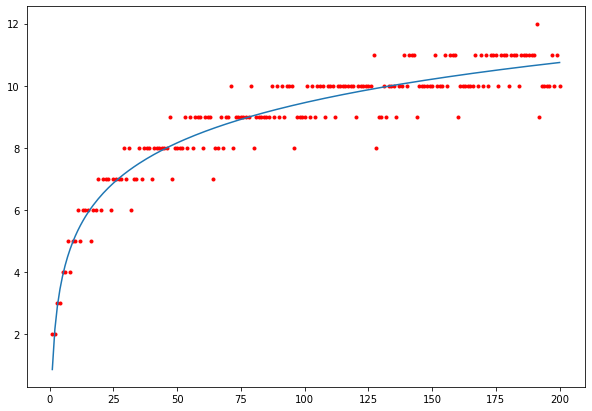

In [14]:
import pylab as plt

x = [i for i in range(1, 201)]
results = [len(findMinStarChain(i)) for i in range(1, 201)]
lnxi = [math.log(i, math.e) for i in range(1, 201)]
lnxi_pow2 = [pow(math.log(i, math.e),2) for i in range(1, 201)]
ylnxi = [results[i-1] * lnxi[i-1] for i in range(1, 201)]

b = (201 * sum(ylnxi) - sum(results) * sum(lnxi)) / (201 * sum(lnxi_pow2) - sum(lnxi) * sum(lnxi))
a = (sum(results) - b * sum(lnxi)) / (201 - 1)

y = [a + b * lnxi[i - 1] for i in range(1, 201)]

plt.figure(figsize = (10, 7))
plt.scatter(x, results, color = 'red', marker = '.')
plt.plot(x, y)
plt.show()

### Вывод:

График показывает, что при $n\to \infty$, $l(n)$ ведет себя так-же как и $\lambda(n)$

### Проверка гипотезы Шольца-Брауэра.

In [ ]:
for i in range (2, 11):
    print("n =", i, len(findMinStarChain(2 ** i -  1)), "<=", len(findMinStarChain(i)) + i - 1, "?", len(findMinStarChain(2 ** i -  1)) <= len(findMinStarChain(i)) + i - 1)

* n = 2 3 <= 3 ? True
* n = 3 5 <= 5 ? True
* n = 4 6 <= 6 ? True
* n = 5 8 <= 8 ? True
* n = 6 9 <= 9 ? True
* n = 7 11 <= 11 ? True
* n = 8 11 <= 11 ? True
* n = 9 13 <= 13 ? True
* n = 10 14 <= 14 ? True

### Вывод:

Для значений от 1 до 10, гипотеза точно верна.

### Вывод:

* Были изучены и реализованы алгоритмы быстрого возведения в степень и нахождения аддитивных цепочек.
* Были получены навыки работы в SageMath.
* Была дана оценка оффективности алгоритмов: Бинароного, Множителей, Брауэра и дробления ВИ.
* Были проверены: 1 следствие из теоремы Брауэра на значениях от 1 до 200 и гипотеза Шольца-Брауэра на значениях от 1 до 10.